In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
path = r'C:\Users\goswa\Desktop\Pratham project folder 6'

In [4]:
df_UFC = pd.read_csv(r'C:\Users\goswa\Desktop\Pratham project folder 6\Prepared data\UFC_Clean.csv', index_col = False)

In [5]:
#check headers 
df_UFC.head()

,R_fighter,B_fighter,fight_date,city,state,country,Winner,weight_class,B_Past_wins,B_Past_losses,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Adrian Yanez,Gustavo Lopez,3/20/2021,Las Vegas,Nevada,United States of America,Red,Bantamweight,1,1,...,0,1,0,0,Orthodox,170.18,177.80,135,31,27
1,Trevin Giles,Roman Dolidze,3/20/2021,Las Vegas,Nevada,United States of America,Red,Middleweight,2,0,...,0,3,0,0,Orthodox,182.88,187.96,185,32,28
2,Tai Tuivasa,Harry Hunsucker,3/20/2021,Las Vegas,Nevada,United States of America,Red,Heavyweight,0,0,...,1,3,0,0,Southpaw,187.96,190.50,264,32,28
3,Cheyanne Buys,Montserrat Conejo,3/20/2021,Las Vegas,Nevada,United States of America,Blue,WomenStrawweight,0,0,...,0,0,0,0,Switch,160.02,160.02,115,28,25
4,Marion Reneau,Macy Chiasson,3/20/2021,Las Vegas,Nevada,United States of America,Blue,WomenBantamweight,4,1,...,1,2,2,0,Orthodox,167.64,172.72,135,29,43


In [6]:
#changing column names to keep consistent format
df_UFC.rename(columns = {'R_fighter':'r_fighter','B_fighter':'b_fighter','date':'date_of_fight','Winner':'winner','B_wins':'b_wins','B_losses':'b_losses','B_draw':'b_draw','B_win_by_Decision_Majority':'b_win_by_decision_majority','B_win_by_Decision_Split':'b_win_by_decision_split','B_win_by_Decision_Unanimous':'b_win_by_decision_unanimous','B_win_by_KO/TKO':'b_win_by_ko/tko','B_win_by_Submission':'b_win_by_submission','B_win_by_TKO_Doctor_Stoppage':'b_win_by_tko_doctor_stoppage','B_Stance':'b_stance','B_Height_cms':'b_height_cms','B_Reach_cms':'b_Reach_cms','B_Weight_lbs':'b_weight_lbs','R_wins':'r_wins','R_losses':'r_losses','R_draw':'r_draw','R_win_by_Decision_Majority':'r_win_by_decision_majority','R_win_by_Decision_Split':'r_win_by_decision_split','R_win_by_Decision_Unanimous':'r_win_by_decision_unanimous','R_win_by_KO/TKO':'r_win_by_ko/tko','R_win_by_Submission':'r_win_by_submission','R_win_by_TKO_Doctor_Stoppage':'r_win_by_tko_doctor_stoppage','R_Stance':'r_stance','R_Height_cms':'r_height_cms','R_Reach_cms':'r_Reach_cms','R_Weight_lbs':'r_weight_lbs','B_age':'b_age','R_age':'r_age'}, inplace = True)

In [7]:
df_UFC.head()

,r_fighter,b_fighter,fight_date,city,state,country,winner,weight_class,B_Past_wins,B_Past_losses,...,r_win_by_decision_unanimous,r_win_by_ko/tko,r_win_by_submission,r_win_by_tko_doctor_stoppage,r_stance,r_height_cms,r_Reach_cms,r_weight_lbs,b_age,r_age
0,Adrian Yanez,Gustavo Lopez,3/20/2021,Las Vegas,Nevada,United States of America,Red,Bantamweight,1,1,...,0,1,0,0,Orthodox,170.18,177.80,135,31,27
1,Trevin Giles,Roman Dolidze,3/20/2021,Las Vegas,Nevada,United States of America,Red,Middleweight,2,0,...,0,3,0,0,Orthodox,182.88,187.96,185,32,28
2,Tai Tuivasa,Harry Hunsucker,3/20/2021,Las Vegas,Nevada,United States of America,Red,Heavyweight,0,0,...,1,3,0,0,Southpaw,187.96,190.50,264,32,28
3,Cheyanne Buys,Montserrat Conejo,3/20/2021,Las Vegas,Nevada,United States of America,Blue,WomenStrawweight,0,0,...,0,0,0,0,Switch,160.02,160.02,115,28,25
4,Marion Reneau,Macy Chiasson,3/20/2021,Las Vegas,Nevada,United States of America,Blue,WomenBantamweight,4,1,...,1,2,2,0,Orthodox,167.64,172.72,135,29,43


In [8]:
# Check for missing values
df_UFC.isnull().sum()

r_fighter                         0
b_fighter                         0
fight_date                        0
city                              0
state                             0
country                         406
winner                            0
weight_class                      0
B_Past_wins                       0
B_Past_losses                     0
b_draw                            0
b_win_by_decision_majority        0
b_win_by_decision_split           0
b_win_by_decision_unanimous       0
b_win_by_ko/tko                   0
b_win_by_submission               0
b_win_by_tko_doctor_stoppage      0
b_stance                          0
b_height_cms                      0
b_Reach_cms                       0
b_weight_lbs                      0
R_Past_wins                       0
R_Past_losses                     0
r_draw                            0
r_win_by_decision_majority        0
r_win_by_decision_split           0
r_win_by_decision_unanimous       0
r_win_by_ko/tko             

In [9]:
df_UFC.dropna(subset=['country'], inplace=True)

In [10]:
# Check for missing values
df_UFC.isnull().sum()

r_fighter                       0
b_fighter                       0
fight_date                      0
city                            0
state                           0
country                         0
winner                          0
weight_class                    0
B_Past_wins                     0
B_Past_losses                   0
b_draw                          0
b_win_by_decision_majority      0
b_win_by_decision_split         0
b_win_by_decision_unanimous     0
b_win_by_ko/tko                 0
b_win_by_submission             0
b_win_by_tko_doctor_stoppage    0
b_stance                        0
b_height_cms                    0
b_Reach_cms                     0
b_weight_lbs                    0
R_Past_wins                     0
R_Past_losses                   0
r_draw                          0
r_win_by_decision_majority      0
r_win_by_decision_split         0
r_win_by_decision_unanimous     0
r_win_by_ko/tko                 0
r_win_by_submission             0
r_win_by_tko_d

In [11]:
#check for dupes
df_dups = df_UFC[df_UFC.duplicated()]
df_dups.head(20)

,r_fighter,b_fighter,fight_date,city,state,country,winner,weight_class,B_Past_wins,B_Past_losses,...,r_win_by_decision_unanimous,r_win_by_ko/tko,r_win_by_submission,r_win_by_tko_doctor_stoppage,r_stance,r_height_cms,r_Reach_cms,r_weight_lbs,b_age,r_age


C:\Users\goswa\AppData\Local\Temp\ipykernel_15440\2606858060.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_UFC['r_age'], bins=25) # look for outlieres
C:\Users\goswa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\goswa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_con

<Axes: xlabel='r_age', ylabel='Density'>

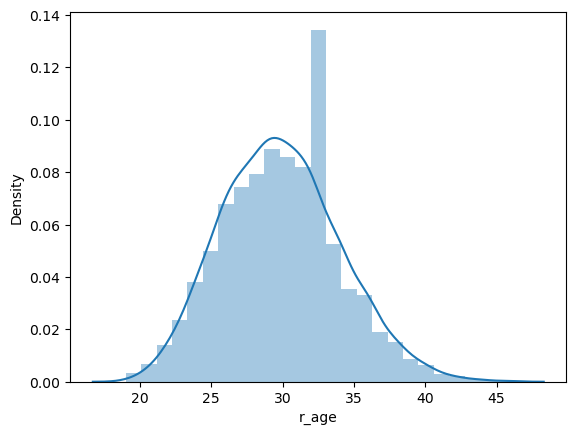

In [12]:
sns.distplot(df_UFC['r_age'], bins=25) # look for outlieres

In [13]:
df_UFC['r_age'].median()

30.0

In [14]:
df_UFC['r_age'].max()

46

In [15]:
df_UFC['r_age'].describe()

count    4540.000000
mean       29.886123
std         4.149448
min        19.000000
25%        27.000000
50%        30.000000
75%        33.000000
max        46.000000
Name: r_age, dtype: float64

In [16]:
df_UFC['r_age'].mean()

29.88612334801762

# 4 Explore Data Visualizations 

In [17]:
#Generating a scatterplot specifically for the variables of age in the red corner relative to weight classes. 
#Earlier analysis indicated a close relationship between the mean, minimum, and maximum ages of both the blue and red corners. 
#Conduct a model test for the red corner's age to assess its potential application to the blue corner in the future.

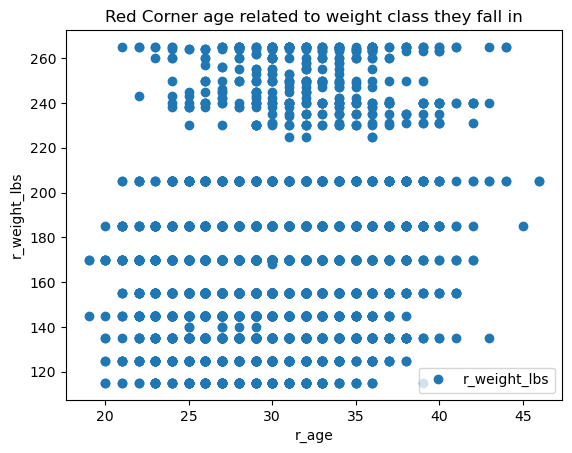

In [18]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_UFC.plot(x = 'r_age', y='r_weight_lbs',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Red Corner age related to weight class they fall in')  
plt.xlabel('r_age')  
plt.ylabel('r_weight_lbs')  
plt.show()

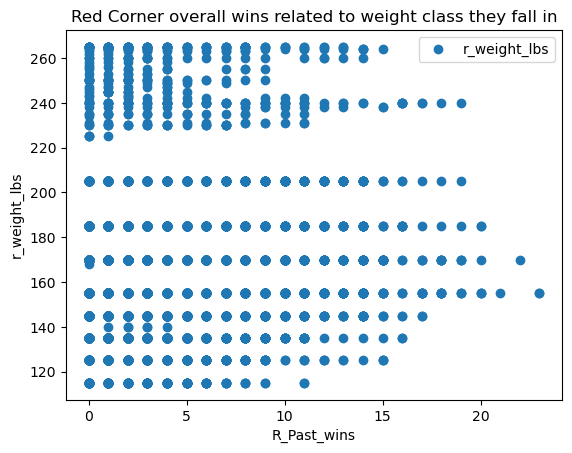

In [19]:
# Create a scatterplot.

df_UFC.plot(x = 'R_Past_wins', y='r_weight_lbs',style='o')
plt.title('Red Corner overall wins related to weight class they fall in')  
plt.xlabel('R_Past_wins')  
plt.ylabel('r_weight_lbs')  
plt.show()

In [20]:
#Transform the variables into NumPy arrays and store them in distinct objects.

In [21]:
X = df_UFC['R_Past_wins'].values.reshape(-1,1)
y = df_UFC['r_weight_lbs'].values.reshape(-1,1)

In [22]:
X

array([[1],
       [4],
       [4],
       ...,
       [0],
       [0],
       [2]], dtype=int64)

In [23]:
y

array([[135],
       [185],
       [264],
       ...,
       [205],
       [185],
       [205]], dtype=int64)

In [24]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [25]:
# Create a regression object.

regression = LinearRegression()  # This will fit onto the training set.

In [26]:
regression.fit(X_train, y_train)

LinearRegression()

In [27]:
LinearRegression()

LinearRegression()

In [28]:
#rerun this cell to display the HTML representation, or alternatively, trust the notebook.
#If you encounter rendering issues on GitHub, consider loading the page using nbviewer.org for proper display.

In [31]:
# Predict y using X.

y_predicted = regression.predict(X_test)

In [32]:
y_predicted_train = regression.predict(X_train)

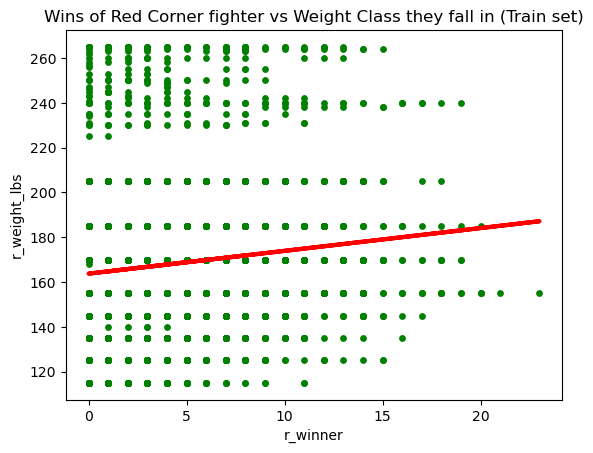

In [33]:

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Wins of Red Corner fighter vs Weight Class they fall in (Train set)')
plot_test.xlabel('r_winner')
plot_test.ylabel('r_weight_lbs')
plot_test.show()

In [34]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)


In [35]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.01743338]]
Mean squared error:  1168.2270502041354
R2 score:  0.013888891340966603


In [36]:
y_predicted

array([[171.8640347 ],
       [167.79430118],
       [165.75943442],
       ...,
       [164.74200104],
       [181.02093512],
       [163.72456766]])

In [37]:
# compare actual and predicted values of y

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,145,171.864035
1,155,167.794301
2,230,165.759434
3,125,164.742001
4,170,166.776868
5,205,175.933768
6,155,171.864035
7,115,166.776868
8,265,167.794301
9,205,165.759434




# Hypothesis: As the fighter's age increases, the corresponding weight class they compete in will also rise.



In [38]:
# 6 Reshape var into numpy
X = df_UFC['r_age'].values.reshape(-1,1)
y = df_UFC['r_weight_lbs'].values.reshape(-1,1)

In [39]:
X

array([[27],
       [28],
       [28],
       ...,
       [30],
       [23],
       [34]], dtype=int64)

In [40]:
y

array([[135],
       [185],
       [264],
       ...,
       [205],
       [185],
       [205]], dtype=int64)

In [41]:
# 7 Split data into two sets: a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [42]:
# 8 Run linear regression on data
regression = LinearRegression()

In [43]:
regression.fit(X_train, y_train)

LinearRegression()

In [44]:
y_predicted = regression.predict(X_test)

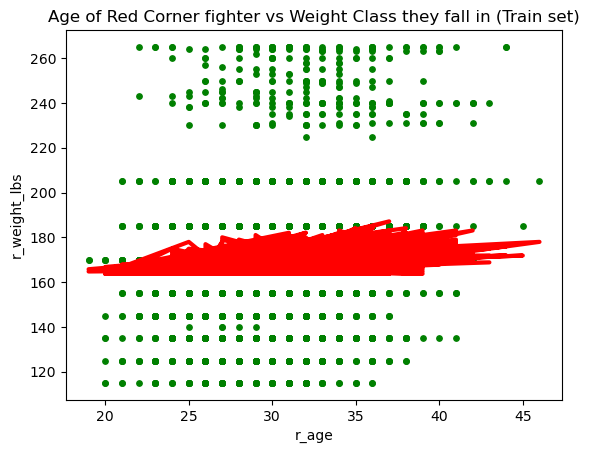

In [45]:

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Age of Red Corner fighter vs Weight Class they fall in (Train set)')
plot_test.xlabel('r_age')
plot_test.ylabel('r_weight_lbs')
plot_test.show()

In [46]:
#predict x_train
y_predicted_train = regression.predict(X_train)

In [47]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [48]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.89586247]]
Mean squared error:  1123.1973276052543
R2 score:  0.05189889090982802


In [49]:
#8 part 2
y_predicted

array([[173.95409552],
       [166.37064566],
       [177.74582045],
       ...,
       [173.95409552],
       [170.16237059],
       [153.0996084 ]])

In [50]:

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,145,173.954096
1,155,166.370646
2,230,177.745820
3,125,156.891333
4,170,175.849958
5,205,172.058233
6,155,179.641683
7,115,154.995471
8,265,173.954096
9,205,172.058233


In [51]:
y_predicted_train = regression.predict(X_train)

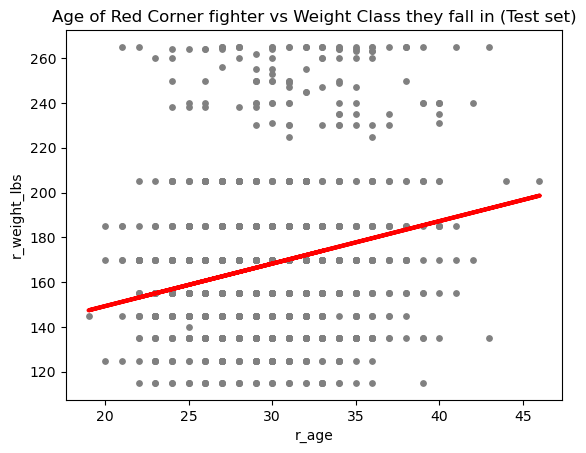

In [52]:
# 9 show regression line on test
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Age of Red Corner fighter vs Weight Class they fall in (Test set)')
plot_test.xlabel('r_age')
plot_test.ylabel('r_weight_lbs')
plot_test.show()

In [53]:
#  summary statistics

rmse = mean_squared_error(y_test, y_predicted) #  mean squared error
r2 = r2_score(y_test, y_predicted) #  R2 score. 

# 11 Check the model performance statistics—MSE and R2 score

In [54]:

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.89586247]]
Mean squared error:  1157.2293380799874
R2 score:  0.0285062171020809


# 10 interpretation of how well the line appears to fit the data

Increasing age corresponds to higher weight classes in fighters, evident from the lowest weight ranges in the youngest age group and significantly higher ranges for those over 40. Analyzing the dataset is complex due to variables changing in various directions, resulting in scattered plot points. Fighters can change weight classes at any time for specific requirements

# 12 Compare the predicted y with the actual y
The consistency of the prediction of poor, sometimes it's only a few lb within and other times its 20-30 lb off

# 13 My thoughts on the model 
Potential bias exists in older years due to limited tech-savvy and data input constraints. The positive slope (1.89) in both models suggests a correlation: as age increases, so does weight. However, high MSE (over 1150) indicates considerable deviation from the regression line within the plot, attributed to diverse weight groups for each age. Both models exhibit a low R2 score (around 3%), indicating poor fit – the data and variables are unsuitable for this model.

In [56]:
# saving and exporting cleaned data set
df_UFC.to_csv(os.path.join(path, 'Prepared data', 'UFC_Clean.csv'))